# A graph
A graph is a way of representing relationships between different objects in a data structure. 
It consists of two main components:
Vertices (or Nodes): These are the individual objects or points in the graph. Each vertex represents an entity, like a city in a map, a user in a social network, or a computer in a network.
Edges: These are the connections between the vertices. An edge represents a relationship between two vertices, like a road connecting two cities, a friendship between two users, or a cable connecting two computers.



<img src="graphs01.jpg" alt="Graphs" width="200"/>


In [22]:
## Graphs Example ## 

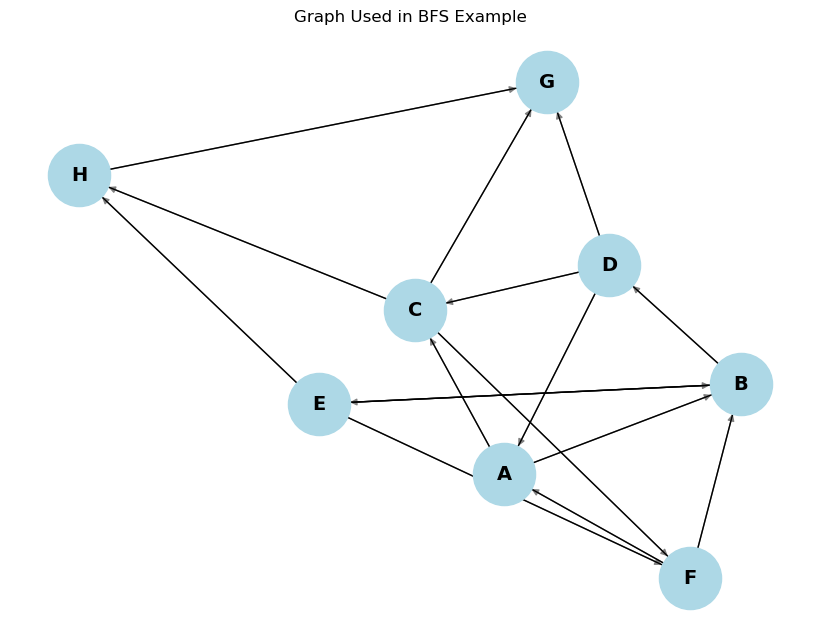

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G', 'H'],
    'D': ['A', 'G', 'C'],
    'E': ['F', 'B', 'H'],
    'F': ['A', 'B'],
    'G': [],
    'H': ['G']
    
}

# Create a directed graph object
G = nx.DiGraph()

# Add edges based on the adjacency list
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Define the layout of the graph (spring layout)
pos = nx.spring_layout(G)

# Draw the graph with nodes and edges
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=14, font_weight='bold', edge_color='gray')
nx.draw_networkx_edges(G, pos, arrows=True)

# Set the title
plt.title("Graph Used in BFS Example")

# Show the plot
plt.show()


## Classification of Graph Algorithms

## Traversal Algorithms
•	Depth-First Search (DFS)
•	Breadth-First Search (BFS)
## Shortest Path Algorithms
•	Dijkstra’s Algorithm
•	Bellman-Ford Algorithm
•	Floyd-Warshall Algorithm
•	A* Algorithm
## Minimum Spanning Tree (MST) Algorithms
•	Prim’s Algorithm
•	Kruskal’s Algorithm
•	Borůvka’s Algorithm
## Topological Sorting
•	Kahn’s Algorithm
•	DFS-based Topological Sort
## Connected Components Algorithms
•	Union-Find Algorithm
•	Kosaraju’s Algorithm (for SCC)
•	Tarjan’s Algorithm (for SCC)
## Maximum Flow Algorithms
•	Ford-Fulkerson Algorithm
•	Edmonds-Karp Algorithm
•	Dinic’s Algorithm
•	Push-Relabel Algorithm
## Graph Coloring Algorithms
•	Greedy Coloring Algorithm
•	Backtracking-based Coloring
•	Welsh-Powell Algorithm
•	Matching Algorithms
## Eulerian and Hamiltonian Path Algorithms
•	Hierholzer’s Algorithm (for Eulerian Path)
•	Backtracking-based approach for Hamiltonian Path


## Breadth-First Search (BFS)
Breadth-first search (BFS) is an algorithm for searching a tree data structure for a node that satisfies a given property. It starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level. Extra memory, usually a queue, is needed to keep track of the child nodes that were encountered but not yet explored.


Overview
    •	Level-order traversal of a graph.
    •	Uses a Queue.
    •	Useful for finding shortest path in unweighted graphs.
Algorithm
    1.	Start from source node.
    2.	Mark it as visited and enqueue it.
    3.	Dequeue a node, explore its unvisited neighbors and enqueue them.

Time Complexity: O(V + E)

Applications:
•	Shortest path (unweighted)
•	Level traversal
•	Connected components (in undirected graph)

Algorithms:

BFS(Graph G, Node start):
    Create an empty set visited
    Create an empty queue Q

    Add start to visited
    Enqueue start into Q

    while Q is not empty:
        current_node = Dequeue Q
        Process current_node (e.g., print or store)

        for each neighbor in G.adjacent_nodes(current_node):
            if neighbor not in visited:
                Add neighbor to visited
                Enqueue neighbor into Q
 




<img src="Animated_BFS.gif" alt="Graphs" width="300"/>

In [9]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end=' ')
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)


In [11]:
print("BFS starting from A:")
bfs(graph, 'A')

BFS starting from A:
A B C D E F G H 

## Depth-First Search (DFS)
Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking. Extra memory, usually a stack, is needed to keep track of the nodes discovered so far along a specified branch which helps in backtracking of the graph.

<img src="dfs.gif" alt="Graphs" width="300"/>

DFS(Graph G, Node start):
    Create an empty set visited
    Create an empty stack S

    Push start into S

    while S is not empty:
        current = Pop S
        if current not in visited:
            Mark current as visited
            Process current

            for each neighbor in G.adjacent_nodes(current) in reverse order:
                if neighbor not in visited:
                    Push neighbor into S


In [10]:
def dfs(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end=' ')
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)


In [12]:
print("DFS starting from A:")
dfs(graph, 'A')

DFS starting from A:
A B D G C F H E 

## Shortest path algorithms
Shortest path algorithms are computational methods used to find the most efficient route between two points in a network, often represented as a graph. They are crucial in various applications, including routing in IP networks, dynamic call routing in telephone networks, finding directions between locations, and even solving puzzles like Rubik's Cube

### Dijkstra's Algorithm:


In [14]:
import heapq

def dijkstra(graph, start):
    # Initialize distances
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    # Priority queue for the next node to process
    pq = [(0, start)]

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If found a shorter path
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Example usage
graph = {
    'A': {'B': 10, 'D': 4},
    'B': {'C': 2},
    'C': {},
    'D': {'C': 1}
}

shortest_paths = dijkstra(graph, 'A')
print(shortest_paths)

{'A': 0, 'B': 10, 'C': 5, 'D': 4}


## A* (A-Star) Algorithm 
The A* algorithm is a popular pathfinding and graph traversal algorithm. It is widely used in games, robotics, and AI for finding the shortest and most optimal path from a start node to a goal node.


In [16]:
import heapq

def heuristic(a, b):
    # Manhattan Distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        x, y = current
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if grid[neighbor[0]][neighbor[1]] == 1:  # wall
                    continue
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, goal)
                    f_score[neighbor] = f
                    heapq.heappush(open_set, (f, neighbor))

    return None  # No path found


In [17]:
grid = [
    [0, 0, 0, 0],
    [1, 1, 0, 1],
    [0, 0, 0, 0],
    [0, 1, 1, 0]
]

start = (0, 0)
goal = (3, 3)

path = a_star(grid, start, goal)
print("Path:", path)


Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]


In [19]:
graph = {
    'A': {'B': 2, 'C': 1},
    'B': {'C': 5, 'D': 2, 'E': 4},
    'C': {'E': 2},
    'D': {'G': 1},
    'E': {'G': 3},
    'G': {}
}


In [18]:
h = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 2,
    'E': 2,
    'G': 0
}


In [20]:
import heapq

def a_star(graph, start, goal, h):
    open_set = []
    heapq.heappush(open_set, (h[start], start))
    
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    
    while open_set:
        f_current, current = heapq.heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        for neighbor, cost in graph[current].items():
            tentative_g = g_score[current] + cost
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + h[neighbor]
                heapq.heappush(open_set, (f_score, neighbor))
    
    return None


In [21]:
graph = {
    'A': {'B': 2, 'C': 1},
    'B': {'C': 5, 'D': 2, 'E': 4},
    'C': {'E': 2},
    'D': {'G': 1},
    'E': {'G': 3},
    'G': {}
}

heuristic = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 2,
    'E': 2,
    'G': 0
}

path = a_star(graph, 'A', 'G', heuristic)
print("Shortest path from A to G:", path)


Shortest path from A to G: ['A', 'B', 'D', 'G']
